# Programming Assignment 2
## Part 2: xGBoost

## Instructions

1. **Objective**:  
   Implement an xGBoost classifier for Classification Task in this notebook.

2. **File Naming and Submission**:  
   - Save the completed notebook as `<Roll_No>_P2.ipynb`, replacing `<Roll_No>` with your roll number.  
   - Ensure all code, outputs, and results are included in the submitted file.

3. **Code Placement**:  
   - Write your code **only** in the cells marked as `## CODE REQUIRED ##`.  
   - Place your implementation between the following comments:  
     ```python
     ## START CODE HERE ##
     # Your code along with comments goes here
     ### END CODE HERE ###
     ```
   - Do not modify any other sections of the notebook.
  

4. **Execution and Output**:  
   - Run all cells to ensure the code executes correctly without errors.  
   - Save the notebook **with all outputs visible** before submission.

**NOTE:** Set random seed to `42` wherever randomization is used.


### Problem Statement  
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Implement an xGBoost classifier to predict whether a customer will leave or stay with the company.

### Dataset Description

1. CustomerID: A unique ID that identifies each customer.

2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

3. Country: The country of the customer’s primary residence.

4. State: The state of the customer’s primary residence.

5. City: The city of the customer’s primary residence.

6. Zip Code: The zip code of the customer’s primary residence.

7. Lat Long: The combined latitude and longitude of the customer’s primary residence.

8. Latitude: The latitude of the customer’s primary residence.

9. Longitude: The longitude of the customer’s primary residence.

10. Gender: The customer’s gender: Male, Female

11. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

12. Partner: Indicate if the customer has a partner: Yes, No

13. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

14. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

15. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

16. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

17. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

18. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

19. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

20. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

21. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

22. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

23. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

24. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

25. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

26. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

27. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

28. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

29. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

30. Churn Value: **Target Variable**. 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

31. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

32. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

33. Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

Reference:
https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


### Import Modules
**NOTE:** To draw the tree, you will also need to install `graphviz`, you can do that with the following command: `conda install graphviz python-graphviz`.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Load Dataset
Load in the dataset from the given file.

In [7]:
## CODE REQUIRED ##
### START CODE ###
import pandas as pd

# Load the dataset
dataset_path = "Telco_customer_churn.xlsx"
df = pd.read_excel(dataset_path)

# Display the first few rows of the dataset
print(df.head())
### END CODE ###

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

The four variables `"Churn Label", "Churn Score", "CLTV", "Churn Reason"` contain exit interview information and should not be used for prediciton, so we will remove them.

In [11]:
## CODE REQUIRED ##
### START CODE ###
import pandas as pd

# Remove columns not needed for prediction
drop_columns = ["Churn Label", "Churn Score", "CLTV", "Churn Reason"]
df = df.drop(columns=drop_columns, errors='ignore')

# Display the first few rows of the dataset
print(df.head())

### END CODE ###

   CustomerID         City  Zip Code                Lat Long   Latitude  \
0  3668-QPYBK  Los Angeles     90003  33.964131, -118.272783  33.964131   
1  9237-HQITU  Los Angeles     90005   34.059281, -118.30742  34.059281   
2  9305-CDSKC  Los Angeles     90006  34.048013, -118.293953  34.048013   
3  7892-POOKP  Los Angeles     90010  34.062125, -118.315709  34.062125   
4  0280-XJGEX  Los Angeles     90015  34.039224, -118.266293  34.039224   

    Longitude  Gender Senior Citizen Partner Dependents  ...  \
0 -118.272783    Male             No      No         No  ...   
1 -118.307420  Female             No      No        Yes  ...   
2 -118.293953  Female             No      No        Yes  ...   
3 -118.315709  Female             No     Yes        Yes  ...   
4 -118.266293    Male             No      No        Yes  ...   

   Device Protection Tech Support Streaming TV Streaming Movies  \
0                 No           No           No               No   
1                 No          

Some variables only contain a single value, and will not be useful for classification, so we can remove them.

In [12]:
## CODE REQUIRED ##
### START CODE ###
# Remove columns that contain only a single unique value
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=unique_value_columns, errors='ignore')

# Display the first few rows of the dataset
print(df.head())

### END CODE ###

   CustomerID         City  Zip Code                Lat Long   Latitude  \
0  3668-QPYBK  Los Angeles     90003  33.964131, -118.272783  33.964131   
1  9237-HQITU  Los Angeles     90005   34.059281, -118.30742  34.059281   
2  9305-CDSKC  Los Angeles     90006  34.048013, -118.293953  34.048013   
3  7892-POOKP  Los Angeles     90010  34.062125, -118.315709  34.062125   
4  0280-XJGEX  Los Angeles     90015  34.039224, -118.266293  34.039224   

    Longitude  Gender Senior Citizen Partner Dependents  ...  \
0 -118.272783    Male             No      No         No  ...   
1 -118.307420  Female             No      No        Yes  ...   
2 -118.293953  Female             No      No        Yes  ...   
3 -118.315709  Female             No     Yes        Yes  ...   
4 -118.266293    Male             No      No        Yes  ...   

   Device Protection Tech Support Streaming TV Streaming Movies  \
0                 No           No           No               No   
1                 No          

We don't need 'CustomerID' because it's unique for every customer and useless for classification, or 'Lat Long', since we have separate columns for 'Latitiude' and 'Longitude'.

In [13]:
## CODE REQUIRED ##
### START CODE ###
# Remove 'CustomerID' and 'Lat Long' as they are not useful for classification
df = df.drop(columns=["CustomerID", "Lat Long"], errors='ignore')

# Display the first few rows of the dataset
print(df.head())

### END CODE ###

          City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No       

Remove the whitespace from the column names, and replace it with an underscore `_`. This will be required for drawing the tree.

In [14]:
## CODE REQUIRED ##
### START CODE ###

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Display the first few rows with new column names
print(df.head())
### END CODE ###

          City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No       

Remove whitspace from city names, and replace it with an underscore `_`. We will remove whitespaces from all the values once we have identified missing values.

In [15]:
## CODE REQUIRED ##
### START CODE ###
# Replace spaces with underscores in city names
df['City'] = df['City'].str.replace(' ', '_')

# Display a sample of unique cities to verify the changes
print("\nSample of cities after modification:")
print(df['City'].unique())

### END CODE ###


Sample of cities after modification:
['Los_Angeles' 'Beverly_Hills' 'Huntington_Park' ... 'Standish' 'Tulelake'
 'Olympic_Valley']


### Missing Data

Identify the rows that are missing data. xGBoost determines default behaviour for missing data, so you can just set them to 0, however if there are a lot of missing values you may need to impute artificial values instead.

`Total_Charges` contains numbers, but it is of `object` datatype, so it may contain missing values. Try converting it to numeric values using `pd.to_numeric` to see what happens.

The blank spaces `" "` are an issue. See how many rows are missing data.

In [16]:
## CODE REQUIRED ##
### START CODE ###
# Try converting Total_Charges to numeric, setting errors='coerce' to convert problematic values to NaN
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display columns with missing values (if any)
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Get the total number of rows with any missing values
total_rows_missing = df.isnull().any(axis=1).sum()
print(f"\nTotal rows with missing values: {total_rows_missing}")

# Display a few examples of rows with missing values
print("\nExample rows with missing values:")
print(df[df.isnull().any(axis=1)].head())
### END CODE ###

Columns with missing values:
Total_Charges    11
dtype: int64

Total rows with missing values: 11

Example rows with missing values:
                City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   

        Device_Prot

It is a very small number, so we can simply set the `Total_Charges` for these rows to `0` since these customers have just signed up and have `Tenure_Months` as `0` too.

In [17]:
## CODE REQUIRED ##
### START CODE ###
# Fill missing values in Total_Charges with 0
df['Total_Charges'] = df['Total_Charges'].fillna(0)

# Verify there are no more missing values
missing_values = df.isnull().sum()
print("\nColumns with missing values after filling:")
print(missing_values[missing_values > 0])

# Display a few rows where Total_Charges was 0 to verify
print("\nRows with zero Total_Charges:")
print(df[df['Total_Charges'] == 0][['Tenure_Months', 'Total_Charges']].head())
### END CODE ###


Columns with missing values after filling:
Series([], dtype: int64)

Rows with zero Total_Charges:
      Tenure_Months  Total_Charges
2234              0            0.0
2438              0            0.0
2568              0            0.0
2667              0            0.0
2856              0            0.0


Verify by checking if the customers with `Tenure_Months` as `0` have `Total_Charges` as `0` now.

In [18]:
## CODE REQUIRED ##
### START CODE ###
# Check if all customers with 0 tenure have 0 total charges
zero_tenure = df[df['Tenure_Months'] == 0]
print("Customers with 0 Tenure Months:")
print(zero_tenure[['Tenure_Months', 'Total_Charges']])

# Verify if there are any mismatches (where tenure is 0 but charges are not)
mismatches = zero_tenure[zero_tenure['Total_Charges'] != 0]
print("\nMismatches (tenure=0 but charges≠0):")
print(mismatches[['Tenure_Months', 'Total_Charges']])

# Print summary statistics
print(f"\nTotal customers with 0 tenure: {len(zero_tenure)}")
print(f"Number of mismatches: {len(mismatches)}")
### END CODE ###

Customers with 0 Tenure Months:
      Tenure_Months  Total_Charges
2234              0            0.0
2438              0            0.0
2568              0            0.0
2667              0            0.0
2856              0            0.0
4331              0            0.0
4687              0            0.0
5104              0            0.0
5719              0            0.0
6772              0            0.0
6840              0            0.0

Mismatches (tenure=0 but charges≠0):
Empty DataFrame
Columns: [Tenure_Months, Total_Charges]
Index: []

Total customers with 0 tenure: 11
Number of mismatches: 0


Now, we can convert the column to float.

In [19]:
## CODE REQUIRED ##
### START CODE ###
# Convert Total_Charges to float
df['Total_Charges'] = df['Total_Charges'].astype(float)

# Verify the conversion by checking the datatype
print("Data type of Total_Charges:", df['Total_Charges'].dtype)

# Display a few rows to verify the values are correct
print("\nSample of Total_Charges values:")
print(df[['Tenure_Months', 'Total_Charges']].head())

### END CODE ###

Data type of Total_Charges: float64

Sample of Total_Charges values:
   Tenure_Months  Total_Charges
0              2         108.15
1              2         151.65
2              8         820.50
3             28        3046.05
4             49        5036.30


We have dealt with missing values in the rows, so now we can replace all whitespaces with underscores. **Hint**: use `regex`.

In [20]:
## CODE REQUIRED ##
### START CODE ###
# Replace whitespace with underscores in all string columns using regex
# First, identify object (string) columns
string_columns = df.select_dtypes(include=['object']).columns

# Replace whitespace with underscores in all string columns
for column in string_columns:
   df[column] = df[column].str.replace(r'\s+', '_', regex=True)

# Display sample of the modified data to verify changes
print("Sample of data after replacing whitespace with underscores:")
print(df[string_columns].head())

# Verify unique values in a few categorical columns to ensure the changes
print("\nUnique values in selected columns after modification:")
for column in string_columns[:3]:  # Show first 3 string columns as example
   print(f"\n{column} unique values:")
   print(df[column].unique())

### END CODE ###

Sample of data after replacing whitespace with underscores:
          City  Gender Senior_Citizen Partner Dependents Phone_Service  \
0  Los_Angeles    Male             No      No         No           Yes   
1  Los_Angeles  Female             No      No        Yes           Yes   
2  Los_Angeles  Female             No      No        Yes           Yes   
3  Los_Angeles  Female             No     Yes        Yes           Yes   
4  Los_Angeles    Male             No      No        Yes           Yes   

  Multiple_Lines Internet_Service Online_Security Online_Backup  \
0             No              DSL             Yes           Yes   
1             No      Fiber_optic              No            No   
2            Yes      Fiber_optic              No            No   
3            Yes      Fiber_optic              No            No   
4            Yes      Fiber_optic              No           Yes   

  Device_Protection Tech_Support Streaming_TV Streaming_Movies  \
0                No       

### Feature-Label Split
Split the data into two parts:
1. Features: the columns that we will use to make classifications.
2. Label: the column that we want to predict, i.e., `Churn_Value`.

In [21]:
## CODE REQUIRED ##
### START CODE ###
# Separate features and label
X = df.drop('Churn_Value', axis=1)  # Features (all columns except Churn_Value)
y = df['Churn_Value']               # Label (Churn_Value column)

# Display shapes to verify the split
print("Features shape:", X.shape)
print("Label shape:", y.shape)

# Display first few rows of features and corresponding labels
print("\nFirst few rows of features:")
print(X.head())
print("\nCorresponding labels:")
print(y.head())

### END CODE ###

Features shape: (7043, 23)
Label shape: (7043,)

First few rows of features:
          City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Online_Backup  \
0      No         No              2           Yes  ...           Yes   
1      No        Yes              2           Yes  ...            No   
2      No        Yes              8           Yes  ...            No   
3     Yes        Yes             28           Yes  ...            No   
4      No        Yes             49           Yes  ...           Yes   

  Device_Protection Tech_Support Streaming_TV

### One-Hot Encoding

We are going to use one-hot encoding to deal with categorical variables. You can use sklearn's ColumnTransformer() or pandas's get_dummies(), or explore other options. We have used get_dummies() here.

In [22]:
## CODE REQUIRED ##
### START CODE ###
# Apply one-hot encoding to the features
X_encoded = pd.get_dummies(X)

# Display information about the encoded features
print("Original features shape:", X.shape)
print("Encoded features shape:", X_encoded.shape)

# Display first few rows of encoded data
print("\nFirst few rows of encoded features:")
print(X_encoded.head())

# Show all column names to verify encoding
print("\nEncoded column names:")
print(X_encoded.columns.tolist())

# Verify the number of unique values in numerical columns remained unchanged
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
print("\nVerifying numerical columns weren't encoded:")
for col in numerical_cols:
    print(f"{col}: {X_encoded[col].nunique()} unique values")

### END CODE ###

Original features shape: (7043, 23)
Encoded features shape: (7043, 1178)

First few rows of encoded features:
   Zip_Code   Latitude   Longitude  Tenure_Months  Monthly_Charges  \
0     90003  33.964131 -118.272783              2            53.85   
1     90005  34.059281 -118.307420              2            70.70   
2     90006  34.048013 -118.293953              8            99.65   
3     90010  34.062125 -118.315709             28           104.80   
4     90015  34.039224 -118.266293             49           103.70   

   Total_Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  ...  \
0         108.15        False       False          False      False  ...   
1         151.65        False       False          False      False  ...   
2         820.50        False       False          False      False  ...   
3        3046.05        False       False          False      False  ...   
4        5036.30        False       False          False      False  ...   

   Streaming

### Train-Test Split
There is a significant class imbalance in the dataset. Verify this by dividing the number of people who left the company (`y=1`), by the total number of people in the dataset.

Total number of employees: 7043
Number of employees who left: 1869
Churn rate: 26.54%


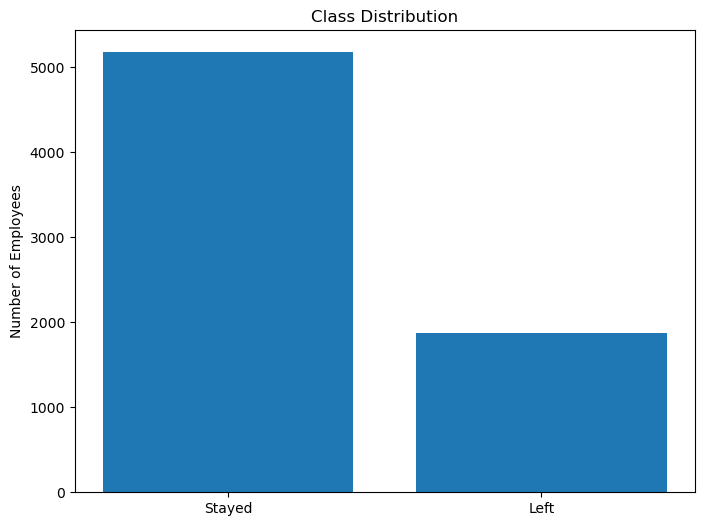

In [23]:
## CODE REQUIRED ##
### START CODE ###
# Calculate class distribution
total_employees = len(y)
employees_left = sum(y)
churn_rate = employees_left / total_employees

print(f"Total number of employees: {total_employees}")
print(f"Number of employees who left: {employees_left}")
print(f"Churn rate: {churn_rate:.2%}")

# Visual representation of class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Stayed', 'Left'], [total_employees - employees_left, employees_left])
plt.title('Class Distribution')
plt.ylabel('Number of Employees')
plt.show()
### END CODE ###

So, when splitting the data into training and testing, you must use `stratify` to maintain the proportion of people who left the company in both sets. Use a `75-25` split for train and test sets.

In [24]:
## CODE REQUIRED ##
### START CODE ###
from sklearn.model_selection import train_test_split

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,  # Using the encoded features
    y,
    test_size=0.25,  # 25% for test set
    train_size=0.75,  # 75% for training set
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class proportions
)

# Verify the split sizes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Verify class distribution in both sets
train_churn_rate = y_train.mean()
test_churn_rate = y_test.mean()

print("\nClass distribution:")
print(f"Training set churn rate: {train_churn_rate:.2%}")
print(f"Testing set churn rate: {test_churn_rate:.2%}")
### END CODE ###

Training set shape: (5282, 1178)
Testing set shape: (1761, 1178)

Class distribution:
Training set churn rate: 26.54%
Testing set churn rate: 26.52%


Verify that the stratification worked as expected.

### xGBoost Model
Build the preliminary xGBoost classifier. Use `binary:logistic` as the objective function and `auc` as the evaluation metric. Use `early_stopping_rounds` to stop building trees when the objective function doesn't improve.

In [34]:
## CODE REQUIRED ##
### START CODE ###

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Convert data into DMatrix format for xGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define parameters for xGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'random_state': 42
}

# Train xGBoost model with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=500, evals=evals, early_stopping_rounds=10, verbose_eval=True)

train_preds = model.predict(dtrain)
val_preds = model.predict(dval)
train_auc_score = roc_auc_score(y_train, train_preds)
val_auc_score = roc_auc_score(y_val, val_preds)
print(f"Training AUC: {train_auc_score:.4f}")
print(f"Validation AUC: {val_auc_score:.4f}")

### END CODE ###

[0]	train-auc:0.87531	eval-auc:0.84195
[1]	train-auc:0.88921	eval-auc:0.85045
[2]	train-auc:0.89533	eval-auc:0.85151
[3]	train-auc:0.90048	eval-auc:0.85290
[4]	train-auc:0.90428	eval-auc:0.85492
[5]	train-auc:0.90826	eval-auc:0.85427
[6]	train-auc:0.91181	eval-auc:0.85495
[7]	train-auc:0.91423	eval-auc:0.85585
[8]	train-auc:0.91640	eval-auc:0.85601
[9]	train-auc:0.91904	eval-auc:0.85594
[10]	train-auc:0.92234	eval-auc:0.85399
[11]	train-auc:0.92451	eval-auc:0.85344
[12]	train-auc:0.92739	eval-auc:0.85188
[13]	train-auc:0.93012	eval-auc:0.85170
[14]	train-auc:0.93379	eval-auc:0.85011
[15]	train-auc:0.93489	eval-auc:0.84970
[16]	train-auc:0.93669	eval-auc:0.85091
[17]	train-auc:0.93726	eval-auc:0.85054
[18]	train-auc:0.93947	eval-auc:0.85001
Training AUC: 0.9395
Validation AUC: 0.8500


Plot the AUC curve for both training and test datasets.

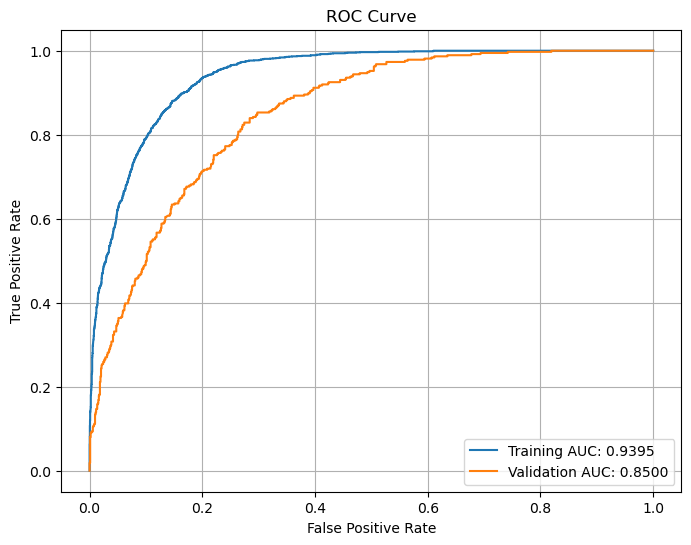

In [37]:
## CODE REQUIRED ##
### START CODE ###
# Plot AUC curve

from sklearn.metrics import roc_curve

train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
val_fpr, val_tpr, _ = roc_curve(y_val, val_preds)
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Training AUC: {train_auc_score:.4f}')
plt.plot(val_fpr, val_tpr, label=f'Validation AUC: {val_auc_score:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### END CODE ###

Draw a confusion matrix for the test dataset.

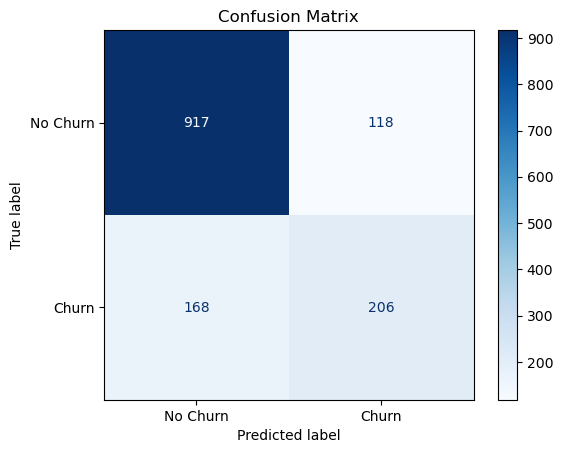

In [39]:
## CODE REQUIRED ##
### START CODE ###
# Draw confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_preds_binary = np.round(val_preds)  # Convert probabilities to binary labels
cm = confusion_matrix(y_val, val_preds_binary)
cmd = ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"])
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### END CODE ###

Plot the AUC-ROC curve (FPR vs. TPR).

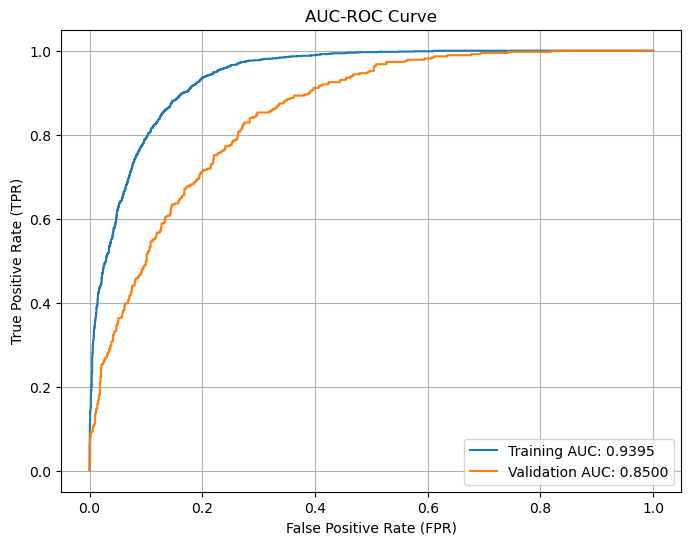

In [40]:
## CODE REQUIRED ##
### START CODE ###

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Training AUC: {train_auc_score:.4f}')
plt.plot(val_fpr, val_tpr, label=f'Validation AUC: {val_auc_score:.4f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.grid()
plt.show()

### END CODE ###

Print the classification report.

In [43]:
## CODE REQUIRED ##
### START CODE ###

from sklearn.metrics import classification_report

# Convert predictions to binary labels
val_preds_binary = np.round(val_preds)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_preds_binary))
### END CODE ###


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



### Hyperparamter Tuning
xGBoost has a lot of hyperparameters:
- `max_depth` - the maximum tree depth
- `learning_rate`
- `gamma` - minimum loss reduction required to make a further partition on a leaf node of the tree
- `reg_lambda` - L2 regularisation parameter
- `scale_pos_weight` - scales the gradient for the positive class to help with imbalanced data
- `colsample_bytree` - subsample ratio of columns when constructing each tree
- `subsample` - ratio of the training instances, prevents overfitting

Each student will tune a specific hyperparameter, determined by the remainder when dividing their roll number by **7**. Follow the instructions below carefully to ensure you are using the correct hyperparameters.

### Steps to Select Hyperparameters:

1. **Identify Your Roll Number**:  
   Use the last five digits of your roll number to determine the corresponding set of hyperparameters.  
   For example, if your roll number is **20CS30067**, you will use the last five digits (30067), and calculate the remainder when divided by **7**.

2. **Calculate the Remainder**:  
   Take the last five digits of your roll number and find the remainder when divided by **7**. This will determine which hyperparameter set you should use:
   - **If the remainder is 0**, use `max_depth`.
   - **If the remainder is 1**, use `learning_rate`.
   - **If the remainder is 2**, use `gamma`.
   - **If the remainder is 3**, use `reg_lambda`.
   - **If the remainder is 4**, use `scale_pos_weight`.
   - **If the remainder is 5**, use `colsample_bytree`.
   - **If the remainder is 6**, use `subsample`.

You are welcome to use `RandomizedSearchCV` or `GridSearchCV` to find the best hyperparameter value for your model.

Find the optimal hyperparameter value and report your findings.

- Train an xGBoost model with the optimal value of the given hyperparameter.
- Plot the AUC curve for both training and test datasets.
- Draw the confusion matrix for the test dataset.
- Plot the AUC-ROC curve.
- Print the classification report.

Are you able to improve your model? Does it classify customers who leave the company (`Churn_Value=1`) better?

In [38]:
## CODE REQUIRED ##
### START CODE ###

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

### END CODE ###

In [39]:
## CODE REQUIRED ##
### START CODE ###
import xgboost as xgb
# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

### END CODE ###

In [40]:
## CODE REQUIRED ##
### START CODE ###
from sklearn.model_selection import RandomizedSearchCV
# Perform random search
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

### END CODE ###

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Generate a dummy dataset (Replace with actual dataset)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary target variable (0 or 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit random search
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc')

In [43]:
## CODE REQUIRED ##
### START CODE ###

# Print best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

### END CODE ###

Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best score: 0.4455303030303031


In [44]:
## CODE REQUIRED ##
### START CODE ###

# Train final model with best parameters
best_model = xgb.XGBClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)


### END CODE ###

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Visualising an xGBoost Tree (Optional)
To get the necessary information, we will only build the first tree, otherwise, we'll get the average over all the trees.
- `weight`: number of times a feature is used in a branch or root across all trees
- `gain`: average gain across all splits that the feature is used in
- `cover`: average coverage across all splits a feature is used in
- `total_gain`: total gain across all splits a feature is used in
- `total_cover`: total coverage across all splits a feature is used in

Build an xGBoost model with `n_estimators=1` and the optimal hyperparameters according to your experiments.

In [ ]:
## CODE REQUIRED ##
### START CODE ###
bst = clf_xgb.get_booster() # Replace clf_xgb with your model variable name
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", condition_node_params=node_params, leaf_node_params=leaf_params)
### END CODE ###

weight:  {'f1': 1.0, 'f13': 1.0, 'f20': 1.0, 'f22': 1.0, 'f23': 1.0, 'f26': 1.0, 'f27': 1.0}
gain:  {'f1': 2.1040496826171875, 'f13': 6.4208221435546875, 'f20': 14.253097534179688, 'f22': 4.952574729919434, 'f23': 48.968055725097656, 'f26': 3.6013193130493164, 'f27': 305.2832946777344}
cover:  {'f1': 64.397216796875, 'f13': 66.5047607421875, 'f20': 35.359928131103516, 'f22': 7.025151252746582, 'f23': 71.18819427490234, 'f26': 4.683434009552002, 'f27': 106.54812622070312}
total_gain:  {'f1': 2.1040496826171875, 'f13': 6.4208221435546875, 'f20': 14.253097534179688, 'f22': 4.952574729919434, 'f23': 48.968055725097656, 'f26': 3.6013193130493164, 'f27': 305.2832946777344}
total_cover:  {'f1': 64.397216796875, 'f13': 66.5047607421875, 'f20': 35.359928131103516, 'f22': 7.025151252746582, 'f23': 71.18819427490234, 'f26': 4.683434009552002, 'f27': 106.54812622070312}


e:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:53:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
## CODE REQUIRED ##
### START CODE ###
bst = clf_xgb.get_booster() # Replace clf_xgb with your model variable name
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", condition_node_params=node_params, leaf_node_params=leaf_params)
### END CODE ###